Importing all the necessary libraries

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

Loading the dataset

In [22]:
df = pd.read_csv('SP 500 ESG Risk Ratings.csv')
df.head()

,Symbol,Name,Address,Sector,Industry,Full Time Employees,Description,Total ESG Risk score,Environment Risk Score,Governance Risk Score,Social Risk Score,Controversy Level,Controversy Score,ESG Risk Percentile,ESG Risk Level
0,ENPH,"Enphase Energy, Inc.","47281 Bayside Parkway\nFremont, CA 94538\nUnit...",Technology,Solar,"3,157","Enphase Energy, Inc., together with its subsid...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,EMN,Eastman Chemical Company,"200 South Wilcox Drive\nKingsport, TN 37662\nU...",Basic Materials,Specialty Chemicals,"14,000",Eastman Chemical Company operates as a special...,25.3,12.8,6.6,5.8,Moderate Controversy Level,2.0,50th percentile,Medium
2,DPZ,Domino's Pizza Inc.,"30 Frank Lloyd Wright Drive\nAnn Arbor, MI 481...",Consumer Cyclical,Restaurants,"6,500","Domino's Pizza, Inc., through its subsidiaries...",29.2,10.6,6.3,12.2,Moderate Controversy Level,2.0,66th percentile,Medium
3,DAY,"Dayforce, Inc.","3311 East Old Shakopee Road\nMinneapolis, MN 5...",Technology,Software - Application,"9,084","Dayforce Inc., together with its subsidiaries,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DVA,Davita Inc.,"2000 16th Street\nDenver, CO 80202\nUnited States",Healthcare,Medical Care Facilities,"70,000",DaVita Inc. provides kidney dialysis services ...,22.6,0.1,8.4,14.1,Moderate Controversy Level,2.0,38th percentile,Medium


Plotting histogram and boxplot of the required columns

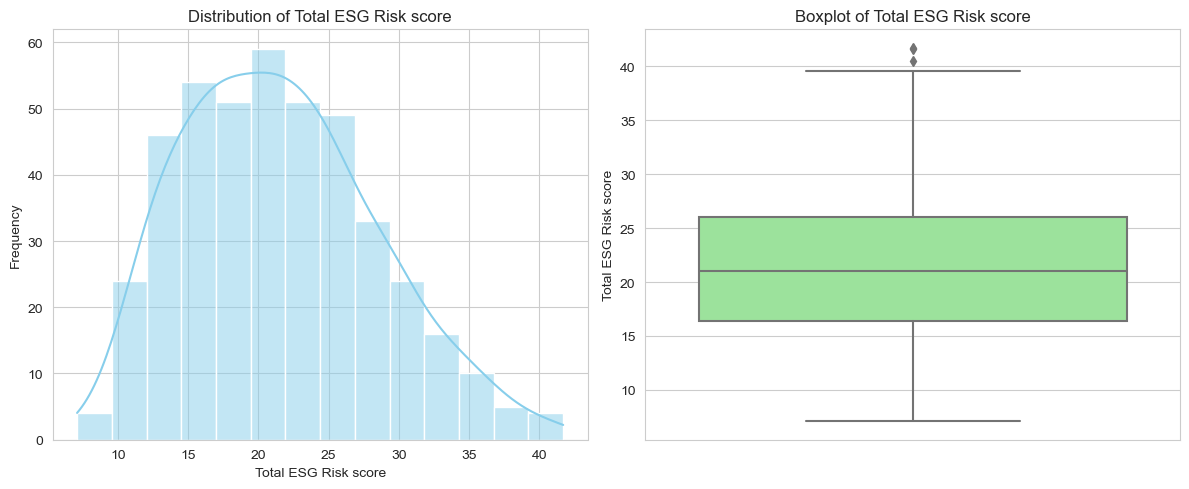

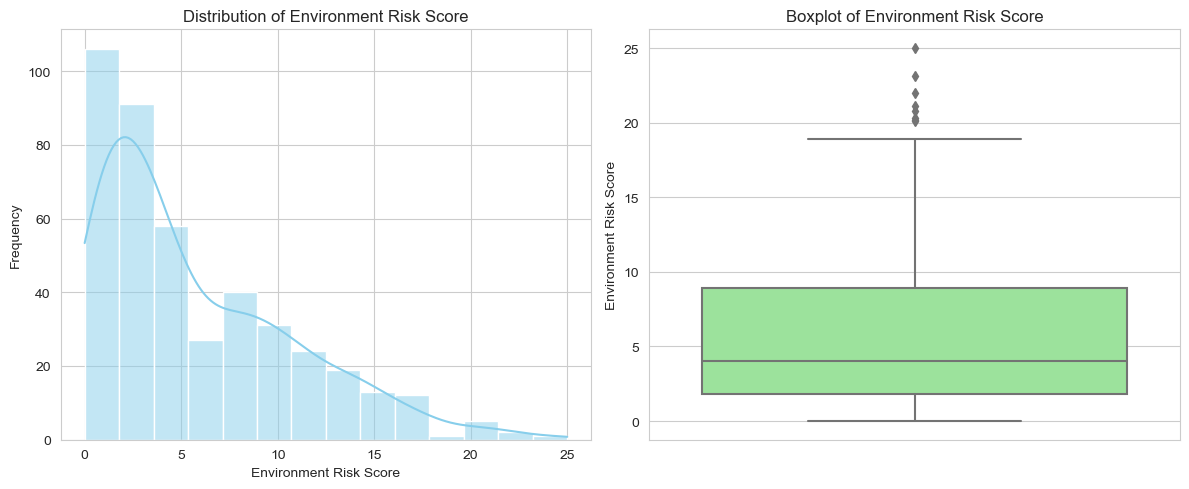

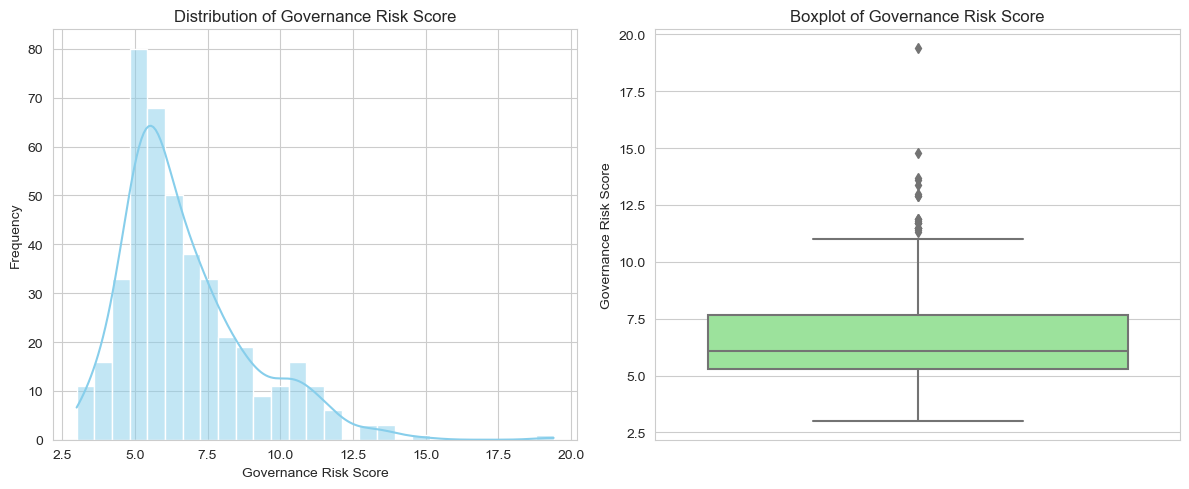

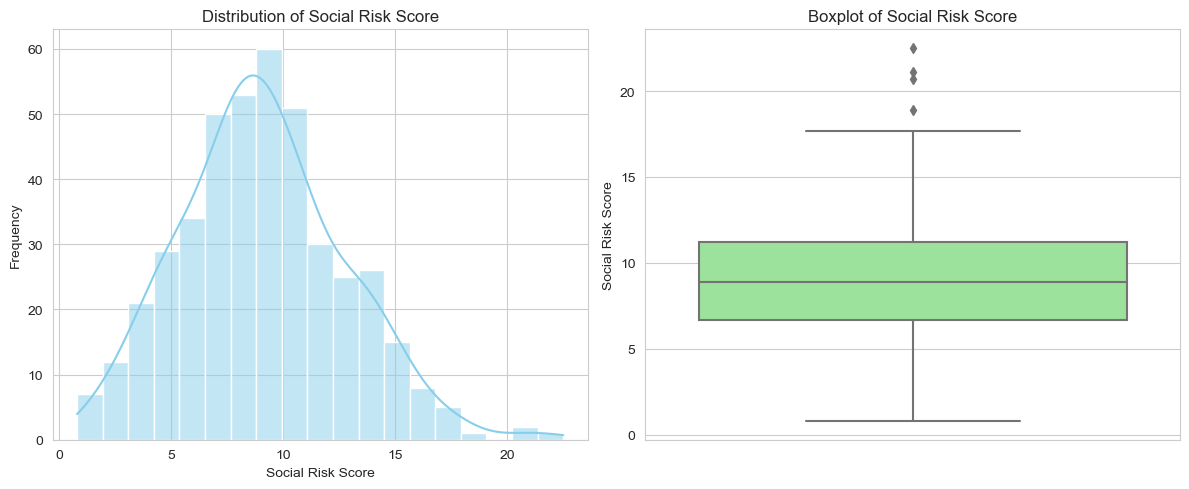

In [23]:
esg_cols = ['Total ESG Risk score', 'Environment Risk Score', 'Governance Risk Score', 'Social Risk Score']

sns.set_style("whitegrid")  

for col in esg_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Histogram with KDE
    sns.histplot(df[col], kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f'Distribution of {col}')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Frequency')

    # Boxplot
    sns.boxplot(y=df[col], ax=axes[1], color='lightgreen')
    axes[1].set_title(f'Boxplot of {col}')
    axes[1].set_xlabel('')
    axes[1].set_ylabel(col)

    plt.tight_layout()
    plt.show()

Plotting histogram of the required columns in a single plot

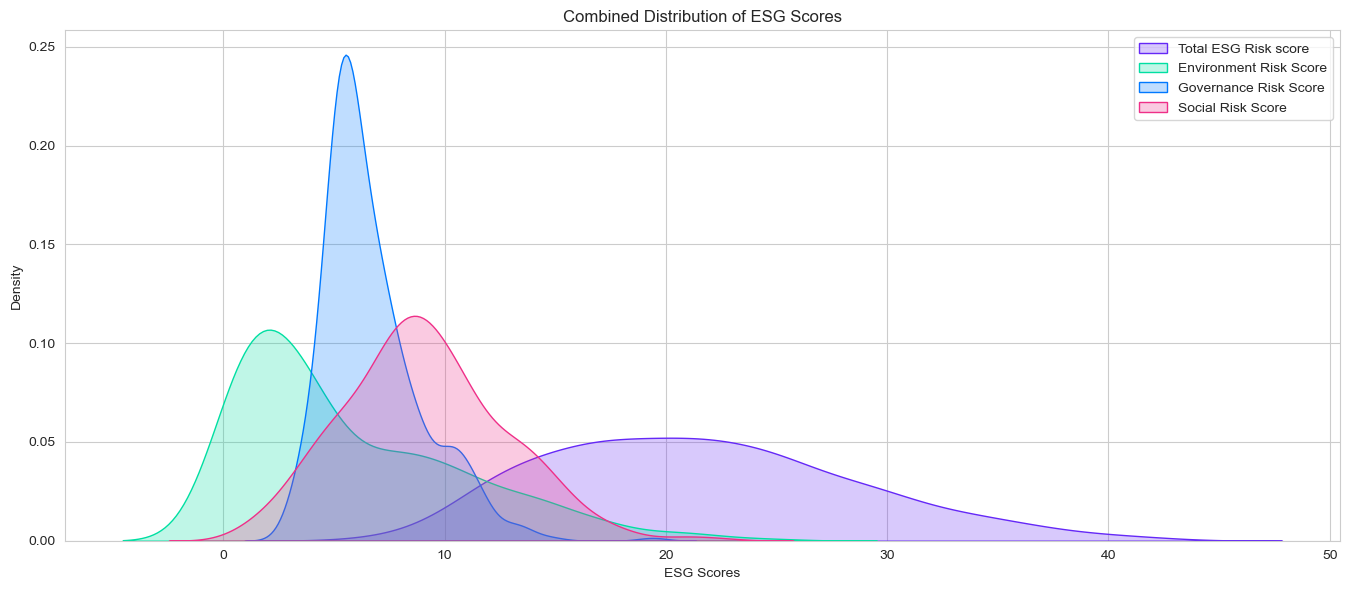

In [43]:
colors = ["#6528F7", "#00DFA2", "#0079FF", "#EF2F88"]

plt.figure(figsize=(13.6, 6))
for i, col in enumerate(esg_cols):
    sns.kdeplot(df[col], label=col, fill=True, color=colors[i])
    
plt.title("Combined Distribution of ESG Scores")
plt.xlabel("ESG Scores")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()


Removing outlier using IQR

In [24]:
df_no_outliers = df.copy()
for col in esg_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_no_outliers = df_no_outliers[(df_no_outliers[col] >= lower) & (df_no_outliers[col] <= upper)]


No. of companies by sector

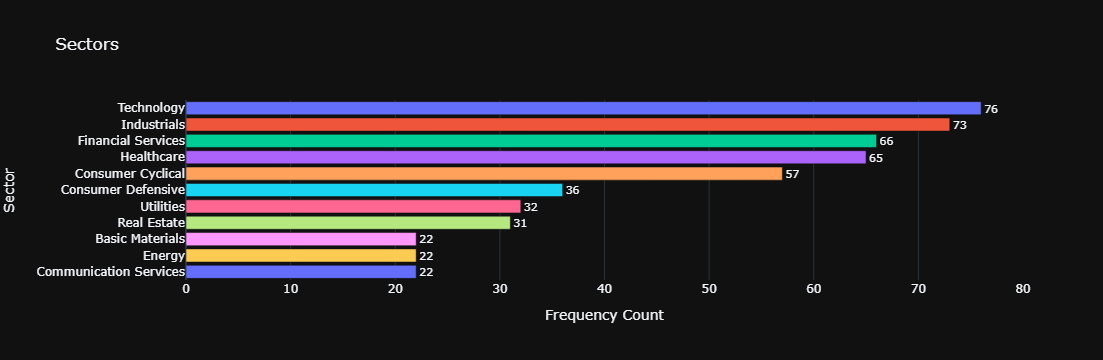

In [28]:
sector_counts = df['Sector'].value_counts().reset_index()
sector_counts.columns = ['Sector', 'Frequency']

# Create a bar chart using Plotly Express
fig = px.bar(sector_counts, x='Frequency', y='Sector', orientation='h', 
             title='Sectors', text='Frequency',
             labels={'Frequency': 'Frequency Count', 'Sector': 'Sector'},
             color='Sector',
            template='plotly_dark')

# Customize the layout
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(showlegend=False)

# Show the plot
fig.show()

 ESG Risk Level Distribution

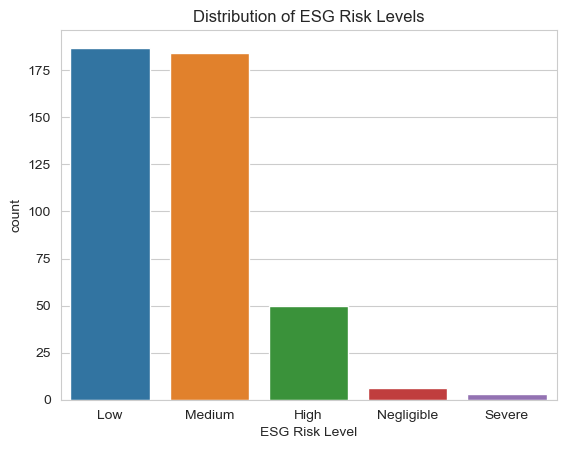

In [25]:
sns.countplot(data=df, x='ESG Risk Level', order=df['ESG Risk Level'].value_counts().index)
plt.title("Distribution of ESG Risk Levels")
plt.show()

ESG Component Correlation Heatmap

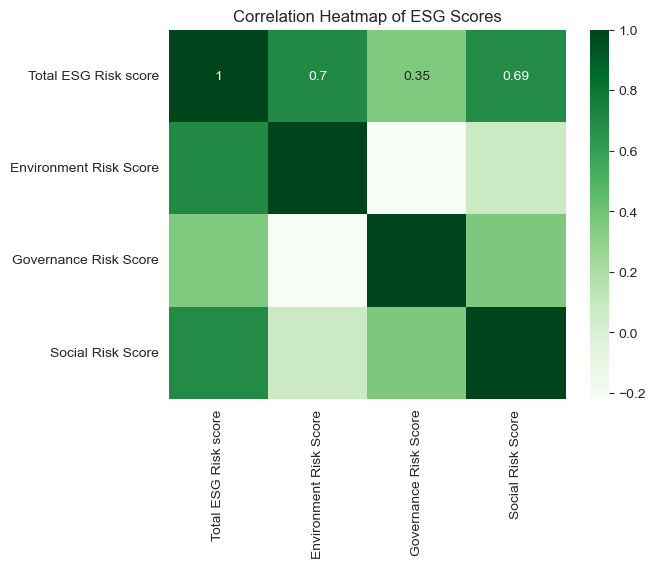

In [26]:
corr = df[esg_cols].corr()
sns.heatmap(corr, annot=True, cmap="Greens")
plt.title("Correlation Heatmap of ESG Scores")
plt.show()

Governance Score vs. Total ESG Risk (Trend Insight)

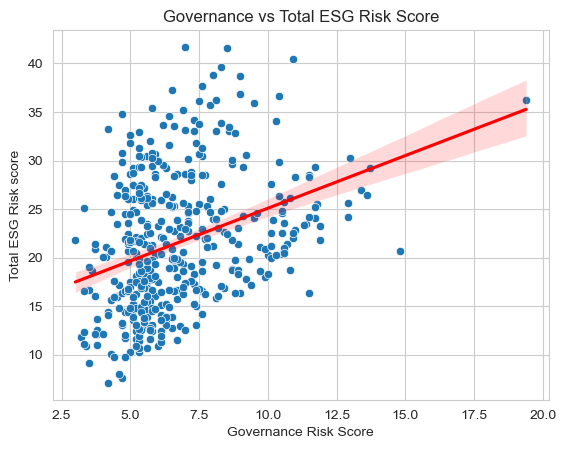

In [27]:
sns.scatterplot(data=df, x='Governance Risk Score', y='Total ESG Risk score')
sns.regplot(data=df, x='Governance Risk Score', y='Total ESG Risk score', scatter=False, color='red')
plt.title("Governance vs Total ESG Risk Score")
plt.show()